In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [28]:
H = np.loadtxt(os.path.join('','data','housing.data'))

In [29]:
A = H[:,:-1] # fatores 
b = H[:,-1] # valores de casas em milhares de dólares

In [30]:
# Adiciona uma última linha com 1's para detectar uma possível constante na regressão
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)

In [31]:
U, S, V = np.linalg.svd(A, full_matrices=False)

In [32]:
Xtilde = V.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

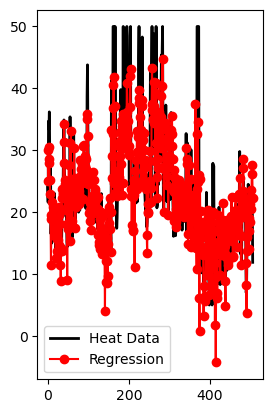

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Heat Data') # Verdadeiros valores
plt.plot(A@Xtilde, '-o', color='r', linewidth=1.5, markersize=6, label='Regression') # Aproximados
plt.legend()
plt.show()

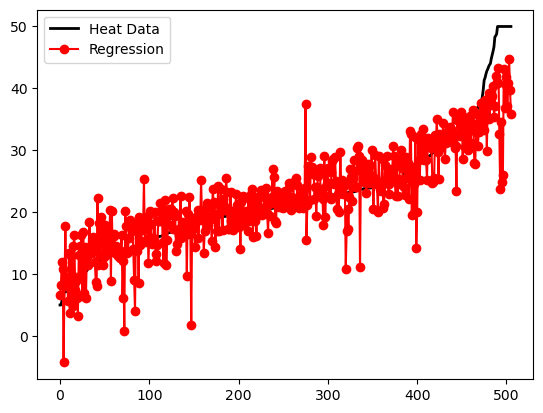

In [34]:
ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1]) #ordena os índices baseado nos preços (crescente)

plt.plot(b[sort_ind], color='k', linewidth=2, label='Heat Data') # Verdadeiros valores
plt.plot(A[sort_ind]@Xtilde, '-o', color='r', linewidth=1.5, markersize=6, label='Regression') # Aproximados
plt.legend()
plt.show()

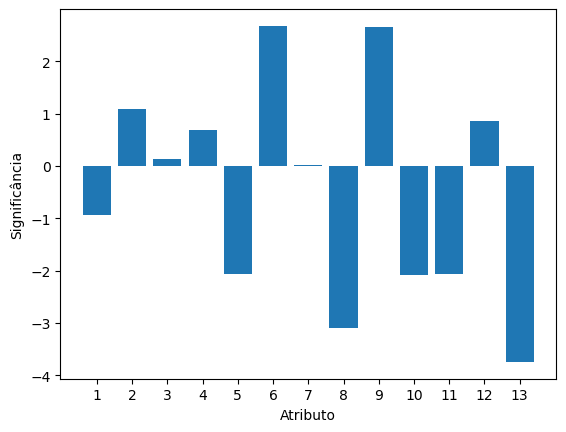

In [35]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Atributo')
plt.ylabel('Significância')
plt.xticks(x_tick)
plt.show()